In [1]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import folium

df = pd.read_csv('Dataset .csv')  


df = df.dropna(subset=['Latitude', 'Longitude'])


map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row.get('Restaurant Name', 'Restaurant'),
        icon=folium.Icon(color='red', icon='cutlery', prefix='fa')
    ).add_to(restaurant_map)


restaurant_map.save('restaurant_map.html')


In [5]:
# Example: Find country code for New Delhi
city_name = "New Delhi"

country_code = df[df['City'] == 'New Delhi']['Country Code'].unique()
print(f"Country Code(s) for {city_name}:", country_code)


Country Code(s) for New Delhi: [1]


In [6]:
city_dist = df['City'].value_counts()
print("Top 10 Cities by Restaurant Count:")
print(city_dist.head(10))


Top 10 Cities by Restaurant Count:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


In [6]:
# Example mapping (you can update with full mapping)
country_map = {
    1: "India", 14: "Australia", 30: "Brazil", 94: "Indonesia", 
    148: "New Zealand", 162: "Philippines", 166: "Qatar", 
    184: "South Africa", 189: "Sri Lanka", 191: "Turkey", 
    208: "United Arab Emirates", 214: "United States"
}

df['Country'] = df['Country Code'].map(country_map)

# Count restaurants by country
country_dist = df['Country'].value_counts()
print("Top Countries by Restaurant Count:")
print(country_dist)


Top Countries by Restaurant Count:
Country
India                   8652
Brazil                    60
United States             60
Sri Lanka                 60
New Zealand               40
United Arab Emirates      34
Australia                 24
Philippines               22
Indonesia                 21
South Africa              20
Qatar                     20
Turkey                    20
Name: count, dtype: int64


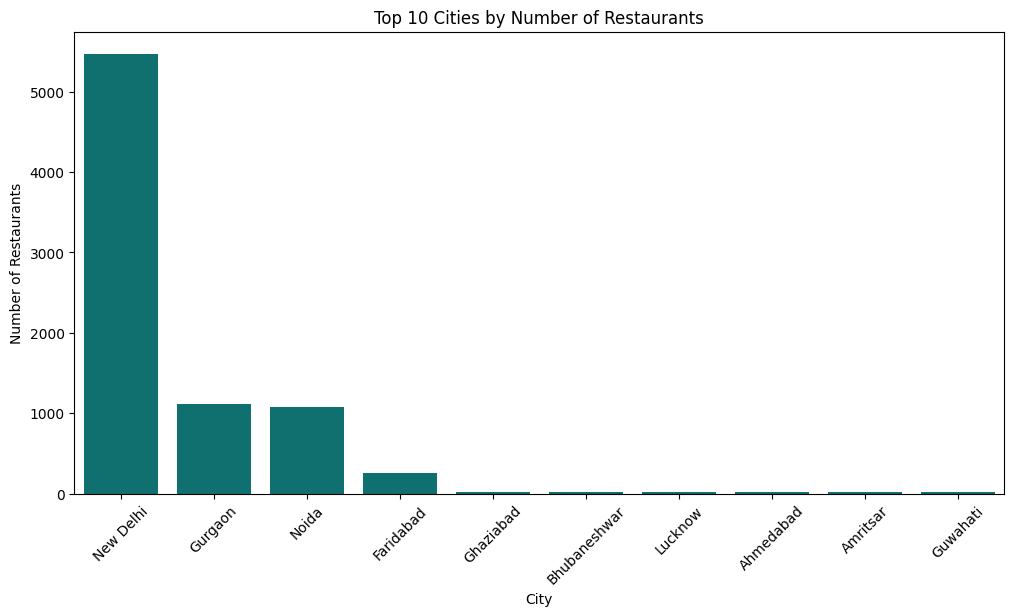

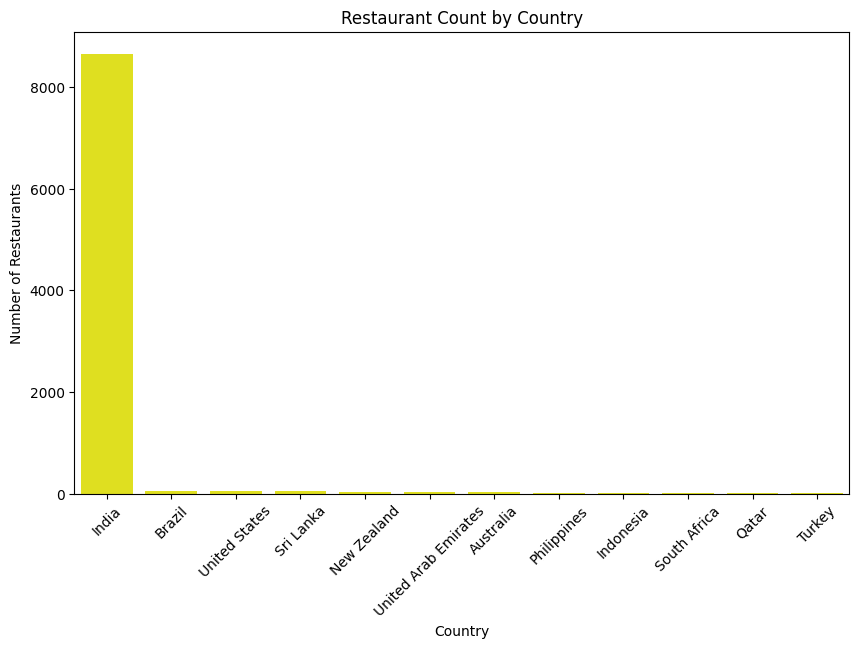

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cities
plt.figure(figsize=(12, 6))
sns.barplot(x=city_dist.head(10).index, y=city_dist.head(10).values, color = 'teal')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xticks(rotation=45)
plt.ylabel('Number of Restaurants')
plt.show()

# Countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_dist.index, y=country_dist.values, color='yellow')
plt.title('Restaurant Count by Country')
plt.xticks(rotation=45)
plt.ylabel('Number of Restaurants')
plt.show()


In [17]:
city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("Top 10 Cities by Average Rating:")
print(city_rating.head(10))


Top 10 Cities by Average Rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64


In [18]:
country_rating = df.groupby('Country')['Aggregate rating'].mean().sort_values(ascending=False)
print("Country-wise Average Ratings:")
print(country_rating)


Country-wise Average Ratings:
Country
Philippines             4.468182
United Arab Emirates    4.300000
Indonesia               4.295238
New Zealand             4.262500
United States           4.233333
Sri Lanka               4.210000
Qatar                   4.060000
Turkey                  3.870000
Brazil                  3.763333
Australia               3.658333
South Africa            3.575000
India                   2.523324
Name: Aggregate rating, dtype: float64


C:\Users\SRISHTI SINGH\AppData\Local\Temp\ipykernel_15860\3643609277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_rating.head(10).index, y=city_rating.head(10).values, palette='rocket')


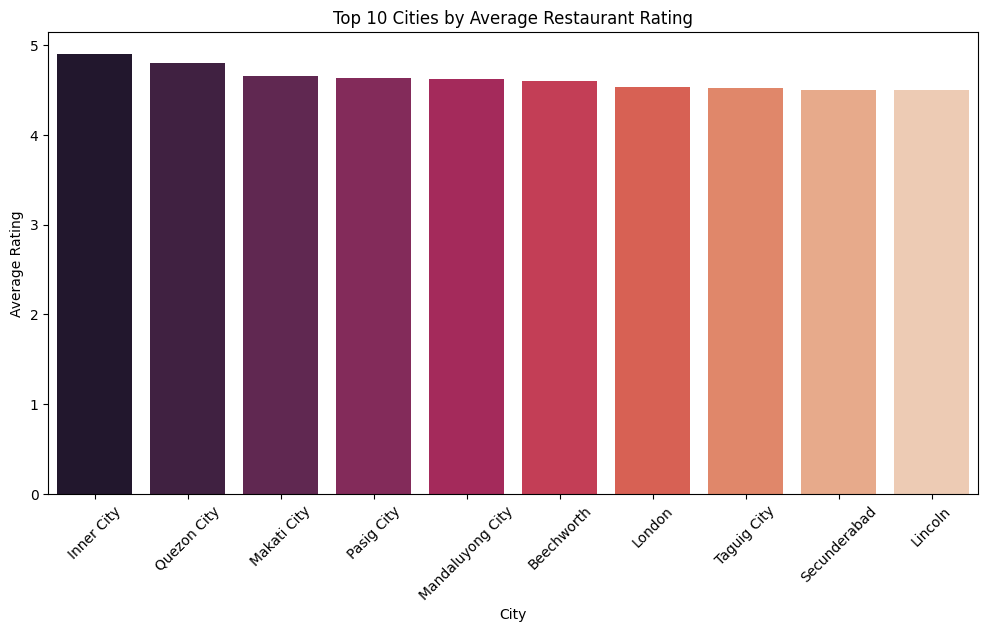

C:\Users\SRISHTI SINGH\AppData\Local\Temp\ipykernel_15860\3643609277.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_rating.index, y=country_rating.values, palette='flare')


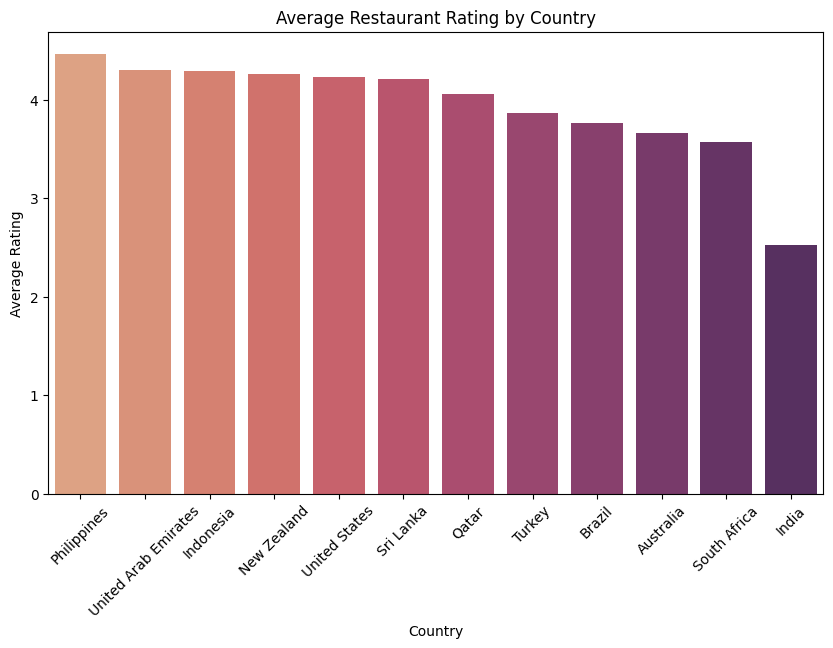

In [19]:
# City ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=city_rating.head(10).index, y=city_rating.head(10).values, palette='rocket')
plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.show()

# Country ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=country_rating.index, y=country_rating.values, palette='flare')
plt.title('Average Restaurant Rating by Country')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.show()


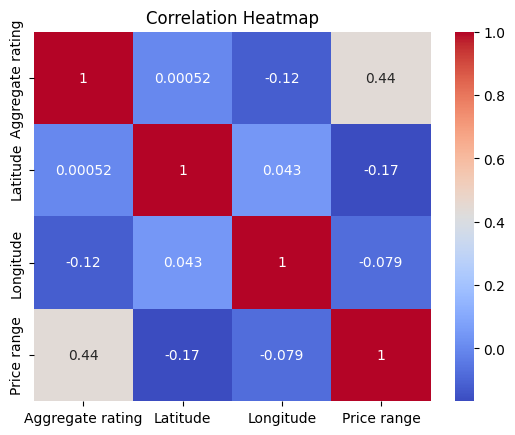

In [20]:
correlation = df[['Aggregate rating', 'Latitude', 'Longitude', 'Price range']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
